<a href="https://colab.research.google.com/github/aliciabenedetto/Projeto-e-An-lise-de-Algoritmos/blob/main/paa_trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluna:** Alicia Benedetto

**Disciplina:** Projeto e Análise de Algoritmos    

In [11]:
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

#  Definição da matriz de distâncias e lista de casas
Criação da matriz que representa as distâncias entre 10 casas fictícias.
- Nós: Casas de 1 a 10.
- Pesos: Distâncias em metros.
- `inf` representa a ausência de caminho direto entre duas casas.


In [12]:
inf = float('inf')

casas = [f"Casa {i+1}" for i in range(10)]

matriz = [
    [0,    2070, 1578, inf,  1652, inf,  inf,  inf,  inf, 1185],
    [2070, 0,    2826, 6780, 2120, inf,  inf,  inf,  inf, 1610],
    [1578, 2826, 0,    inf,  716,  1453, 1593, 1004, 1165, inf],
    [inf,  6780, inf,  0,    4363, inf,  inf,  inf,  inf, 6110],
    [1652, 2120, 716,  4363, 0,    1134, 1133, 1366, 1676, 2200],
    [inf,  inf, 1453,  inf, 1134, 0,    694,  991,  1189, inf],
    [inf,  inf, 1593,  inf, 1133, 694,  0,    1654, 1782, inf],
    [inf,  inf, 1004,  inf, 1366, 991,  1654, 0,    300,  3212],
    [inf,  inf, 1165,  inf, 1676, 1189, 1782, 300,  0,    inf],
    [1185, 1610, inf, 6110, 2200, inf,  inf, 3212, inf, 0]
]

# Função criar_grafo(matriz)
Cria um grafo não direcionado a partir da matriz de distâncias, adicionando arestas apenas para casas com conexão existente (não `inf`).


In [13]:
def criar_grafo(matriz):
    G = nx.Graph()
    n = len(matriz)
    for i in range(n):
        for j in range(i+1, n):
            if matriz[i][j] != inf:
                G.add_edge(i, j, weight=matriz[i][j])
    return G

# Função dijkstra(matriz, origem, destino)
Implementa o algoritmo de Dijkstra:
- Calcula o menor caminho entre um par de casas específico.
- Utiliza uma fila de prioridade para sempre explorar o nó de menor custo atual.


In [14]:
def dijkstra(matriz, origem, destino):
    n = len(matriz)
    dist = [inf] * n
    anterior = [-1] * n
    dist[origem] = 0
    fila = [(0, origem)]

    while fila:
        custo_atual, u = heapq.heappop(fila)
        if u == destino:
            break
        for v in range(n):
            if matriz[u][v] != inf:
                if dist[v] > dist[u] + matriz[u][v]:
                    dist[v] = dist[u] + matriz[u][v]
                    anterior[v] = u
                    heapq.heappush(fila, (dist[v], v))

    caminho = []
    atual = destino
    while atual != -1:
        caminho.append(atual)
        atual = anterior[atual]
    caminho.reverse()

    return dist[destino], caminho

# Função floyd_warshall(matriz)
Implementa o algoritmo de Floyd-Warshall:
- Calcula os menores caminhos entre **todos os pares** de casas.
- Baseado em programação dinâmica.
- Atualiza a matriz de distâncias e registra o próximo nó no caminho mínimo.

# Função reconstruir_caminho(origem, destino, next_hop)
Reconstrói o caminho mínimo entre a origem e o destino usando a matriz `next_hop` gerada pelo Floyd-Warshall.


In [15]:
def floyd_warshall(matriz):
    n = len(matriz)
    dist = np.array(matriz)
    next_hop = np.full((n, n), -1)

    for i in range(n):
        for j in range(n):
            if matriz[i][j] != inf:
                next_hop[i][j] = j

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_hop[i][j] = next_hop[i][k]

    return dist, next_hop

# Reconstruir caminho Floyd-Warshall
def reconstruir_caminho(origem, destino, next_hop):
    if next_hop[origem][destino] == -1:
        return []
    caminho = [origem]
    while origem != destino:
        origem = next_hop[origem][destino]
        caminho.append(origem)
    return caminho

# Função desenhar_grafo(G, caminho, titulo)
Desenha o grafo usando o NetworkX:
- Nós representam casas.
- Arestas em preto representam todas as conexões possíveis.
- Arestas em vermelho destacam o menor caminho encontrado.
- Exibe também os pesos (distâncias) nas arestas.


In [6]:
def desenhar_grafo(G, caminho, titulo):
    pos = nx.circular_layout(G)
    labels = {i: casas[i] for i in G.nodes()}
    edge_labels = nx.get_edge_attributes(G, 'weight')

    path_edges = {(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)}
    path_edges.update({(b, a) for (a, b) in path_edges})

    edge_colors = ['red' if (u, v) in path_edges else 'black' for u, v in G.edges()]

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightgreen',
            node_size=2000, font_size=10, edge_color=edge_colors, width=2)
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels={(u, v): f'{int(d)} m' for (u, v), d in edge_labels.items()},
        font_color='blue', font_size=8
    )

    plt.title(titulo)
    plt.show()

# Função main()

- Executa o Floyd-Warshall para preparar a matriz de menores caminhos.
- Cria o grafo com base na matriz.
- Define casas de origem e destino.
- Executa Dijkstra e Floyd-Warshall para encontrar e mostrar o menor caminho.
- Desenha o grafo com o caminho mínimo para cada algoritmo.
- Mede o tempo de execução de cada algoritmo.


[DIJKSTRA]
- Menor distância de Casa 3 para Casa 10: 2763.0 m
- Caminho: Casa 3 -> Casa 1 -> Casa 10
- Tempo de execução: 0.04 ms


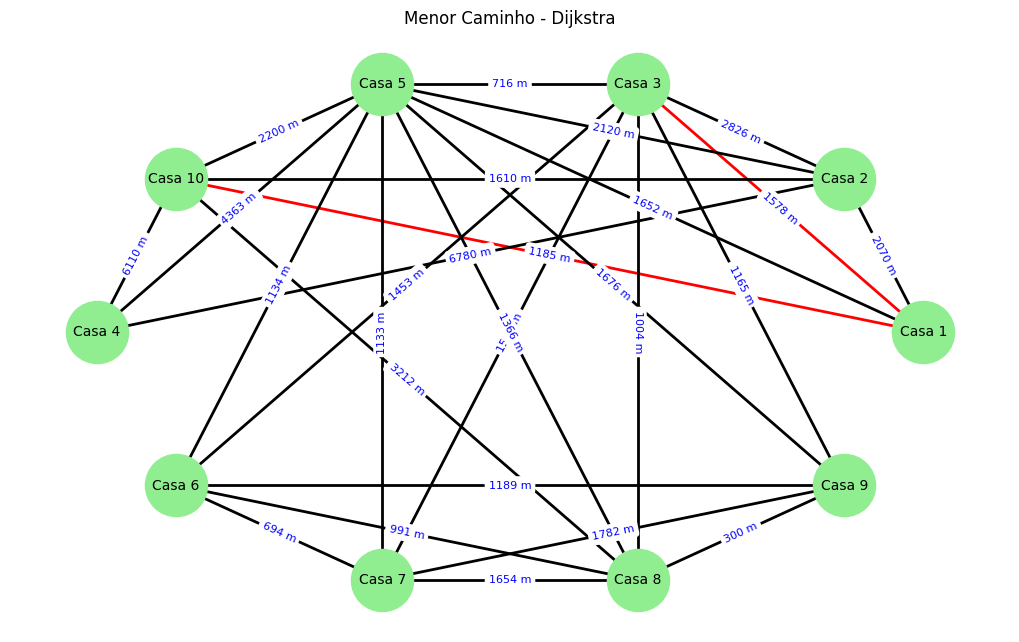


[FLOYD-WARSHALL]
- Menor distância de Casa 3 para Casa 10: 2763.0 m
- Caminho: Casa 3 -> Casa 1 -> Casa 10
- Tempo de execução: 0.02 ms


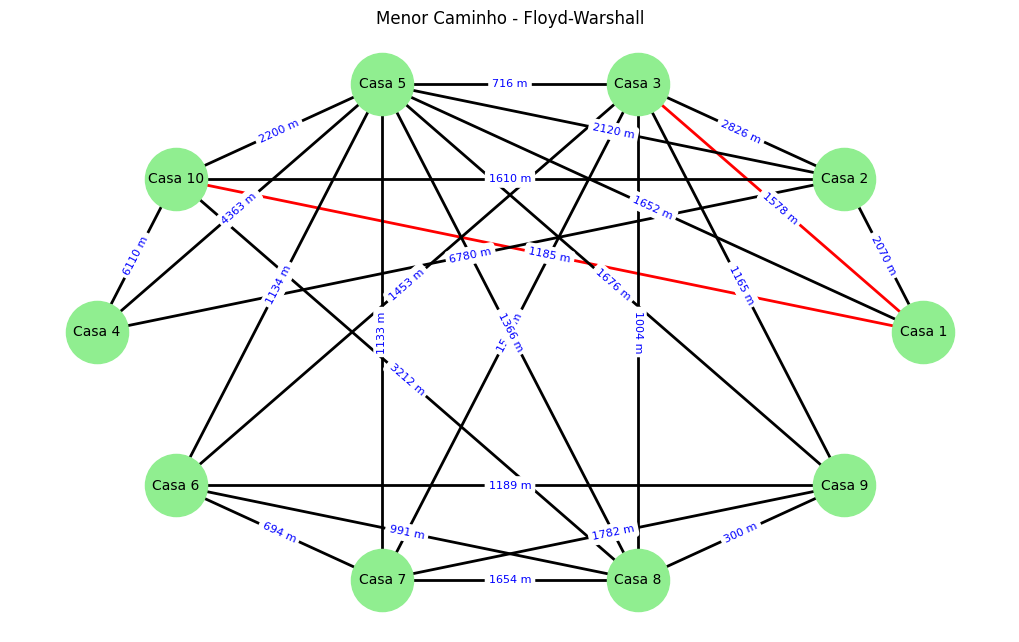

In [10]:
def main():
    dist_fw, next_hop = floyd_warshall(matriz)
    G = criar_grafo(matriz)

    origem = 2
    destino = 9

    if dist_fw[origem][destino] == inf:
        print("\nNão existe caminho entre as casas selecionadas.")
    else:
        # Dijkstra
        inicio_dijkstra = time.time()
        custo_dijkstra, caminho_dijkstra = dijkstra(matriz, origem, destino)
        fim_dijkstra = time.time()

        print("\n[DIJKSTRA]")
        print(f"- Menor distância de {casas[origem]} para {casas[destino]}: {custo_dijkstra:.1f} m")
        print("- Caminho:", " -> ".join(casas[i] for i in caminho_dijkstra))
        print(f"- Tempo de execução: {(fim_dijkstra - inicio_dijkstra) * 1000:.2f} ms")

        desenhar_grafo(G, caminho_dijkstra, "Menor Caminho - Dijkstra")

        # Floyd-Warshall
        inicio_fw = time.time()
        custo_fw = dist_fw[origem][destino]
        caminho_fw = reconstruir_caminho(origem, destino, next_hop)
        fim_fw = time.time()

        print("\n[FLOYD-WARSHALL]")
        print(f"- Menor distância de {casas[origem]} para {casas[destino]}: {custo_fw:.1f} m")
        print("- Caminho:", " -> ".join(casas[i] for i in caminho_fw))
        print(f"- Tempo de execução: {(fim_fw - inicio_fw) * 1000:.2f} ms")

        desenhar_grafo(G, caminho_fw, "Menor Caminho - Floyd-Warshall")

if __name__ == "__main__":
    main()